In [1]:
import numpy as np #MAKES NECESSARY IMPORTS
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")#REMOVES ANNOYING WARNINGS

In [2]:
df=pd.read_csv("worldometer_coronavirus_daily_data.csv")#read daily data

In [3]:
df_summary = pd.read_csv("worldometer_coronavirus_summary_data.csv")#read summary data

In [4]:
df.head()

date      country  cumulative_total_cases  daily_new_cases  \
0  2020-2-15  Afghanistan                     0.0              NaN   
1  2020-2-16  Afghanistan                     0.0              NaN   
2  2020-2-17  Afghanistan                     0.0              NaN   
3  2020-2-18  Afghanistan                     0.0              NaN   
4  2020-2-19  Afghanistan                     0.0              NaN   

   active_cases  cumulative_total_deaths  daily_new_deaths  
0           0.0                      0.0               NaN  
1           0.0                      0.0               NaN  
2           0.0                      0.0               NaN  
3           0.0                      0.0               NaN  
4           0.0                      0.0               NaN

In [5]:
df.info()#view data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     117064 non-null  object 
 1   country                  117064 non-null  object 
 2   cumulative_total_cases   117064 non-null  float64
 3   daily_new_cases          110191 non-null  float64
 4   active_cases             116532 non-null  float64
 5   cumulative_total_deaths  110148 non-null  float64
 6   daily_new_deaths         96221 non-null   float64
dtypes: float64(5), object(2)
memory usage: 6.3+ MB


In [6]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df.fillna(0,inplace=True)

In [8]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         220 non-null    object 
 1   continent                       220 non-null    object 
 2   total_confirmed                 220 non-null    int64  
 3   total_deaths                    207 non-null    float64
 4   total_recovered                 219 non-null    float64
 5   active_cases                    219 non-null    float64
 6   serious_or_critical             146 non-null    float64
 7   total_cases_per_1m_population   220 non-null    int64  
 8   total_deaths_per_1m_population  204 non-null    float64
 9   total_tests                     210 non-null    float64
 10  total_tests_per_1m_population   210 non-null    float64
 11  population                      220 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [9]:
df.describe()

cumulative_total_cases  daily_new_cases  active_cases  \
count            1.170640e+05    117064.000000  1.170640e+05   
mean             3.232067e+05      1691.084860  4.265748e+04   
std              1.855618e+06     10247.365257  3.388383e+05   
min              0.000000e+00      -322.000000 -1.432100e+04   
25%              3.230000e+02         0.000000  2.800000e+01   
50%              6.603000e+03        28.000000  7.820000e+02   
75%              8.798600e+04       471.000000  9.189250e+03   
max              3.568851e+07    414433.000000  9.041162e+06   

       cumulative_total_deaths  daily_new_deaths  
count            117064.000000     117064.000000  
mean               7763.510507         36.077035  
std               37317.014065        183.500313  
min                   0.000000        -31.000000  
25%                   3.000000          0.000000  
50%                 103.000000          0.000000  
75%                1540.000000          7.000000  
max              629064.000000       5015.000000

In [10]:
df_summary.describe()

total_confirmed   total_deaths  total_recovered  active_cases  \
count     2.200000e+02     207.000000     2.190000e+02  2.190000e+02   
mean      9.021924e+05   20443.859903     8.106192e+05  6.763399e+04   
std       3.598470e+06   71537.092423     3.251487e+06  3.868977e+05   
min       1.000000e+00       1.000000     1.000000e+00 -1.489000e+03   
25%       7.896500e+03     150.500000     5.355000e+03  4.055000e+02   
50%       7.733750e+04    1375.000000     6.286300e+04  3.488000e+03   
75%       4.099940e+05    8071.500000     3.809640e+05  2.076650e+04   
max       3.573397e+07  629290.000000     3.081287e+07  5.438593e+06   

       serious_or_critical  total_cases_per_1m_population  \
count           146.000000                     220.000000   
mean            602.178082                   39901.322727   
std            1625.414059                   42102.158641   
min               1.000000                       9.000000   
25%               9.000000                    3090.500000   
50%              36.500000                   26154.500000   
75%             309.000000                   68381.000000   
max            9375.000000                  189643.000000   

       total_deaths_per_1m_population   total_tests  \
count                      204.000000  2.100000e+02   
mean                       707.196078  1.432069e+07   
std                        847.655806  5.475965e+07   
min                          2.000000  1.408000e+03   
25%                         67.250000  1.787430e+05   
50%                        363.500000  1.315024e+06   
75%                       1069.500000  6.732616e+06   
max                       5865.000000  5.295773e+08   

       total_tests_per_1m_population    population  
count                   2.100000e+02  2.200000e+02  
mean                    9.025879e+05  3.563921e+07  
std                     1.645828e+06  1.402212e+08  
min                     2.882000e+03  8.030000e+02  
25%                     8.885250e+04  6.347295e+05  
50%                     3.416410e+05  6.580660e+06  
75%                     1.002095e+06  2.418337e+07  
max                     1.311142e+07  1.439324e+09

In [285]:
df_summary.head()

country continent  total_confirmed  total_deaths  total_recovered  \
0  Afghanistan      Asia           147473        6736.0          98073.0   
1      Albania    Europe           133081        2457.0         130222.0   
2      Algeria    Africa           171392        4254.0         115276.0   
3      Andorra    Europe            14678         128.0          14210.0   
4       Angola    Africa            42646        1008.0          36708.0   

   active_cases  serious_or_critical  total_cases_per_1m_population  \
0       42664.0               1124.0                           3699   
1         402.0                  3.0                          46299   
2       51862.0                 47.0                           3834   
3         340.0                  NaN                         189643   
4        4930.0                  8.0                           1256   

   total_deaths_per_1m_population  total_tests  total_tests_per_1m_population  \
0                           169.0     707244.0                        17739.0   
1                           855.0     916777.0                       318945.0   
2                            95.0     230861.0                         5164.0   
3                          1654.0     193595.0                      2501292.0   
4                            30.0     681443.0                        20065.0   

   population  
0    39869084  
1     2874408  
2    44701619  
3       77398  
4    33961015

# DATA ANALYSIS

SO LET'S TAKE THE 6 MOST POPULATED COUNTRIES AND 6 LEAST POPULATED COUNTRIES..
THE GOAL IS TO SEE THE IMPACT OF POPULATION ON COVID-19 ACTIVITY.

In [56]:
top_6_pop = df_summary.sort_values("population",ascending=False)[:6][["country","continent"]]
last_6_pop = df_summary.sort_values("population",ascending=False)[-6:][["country","continent"]]

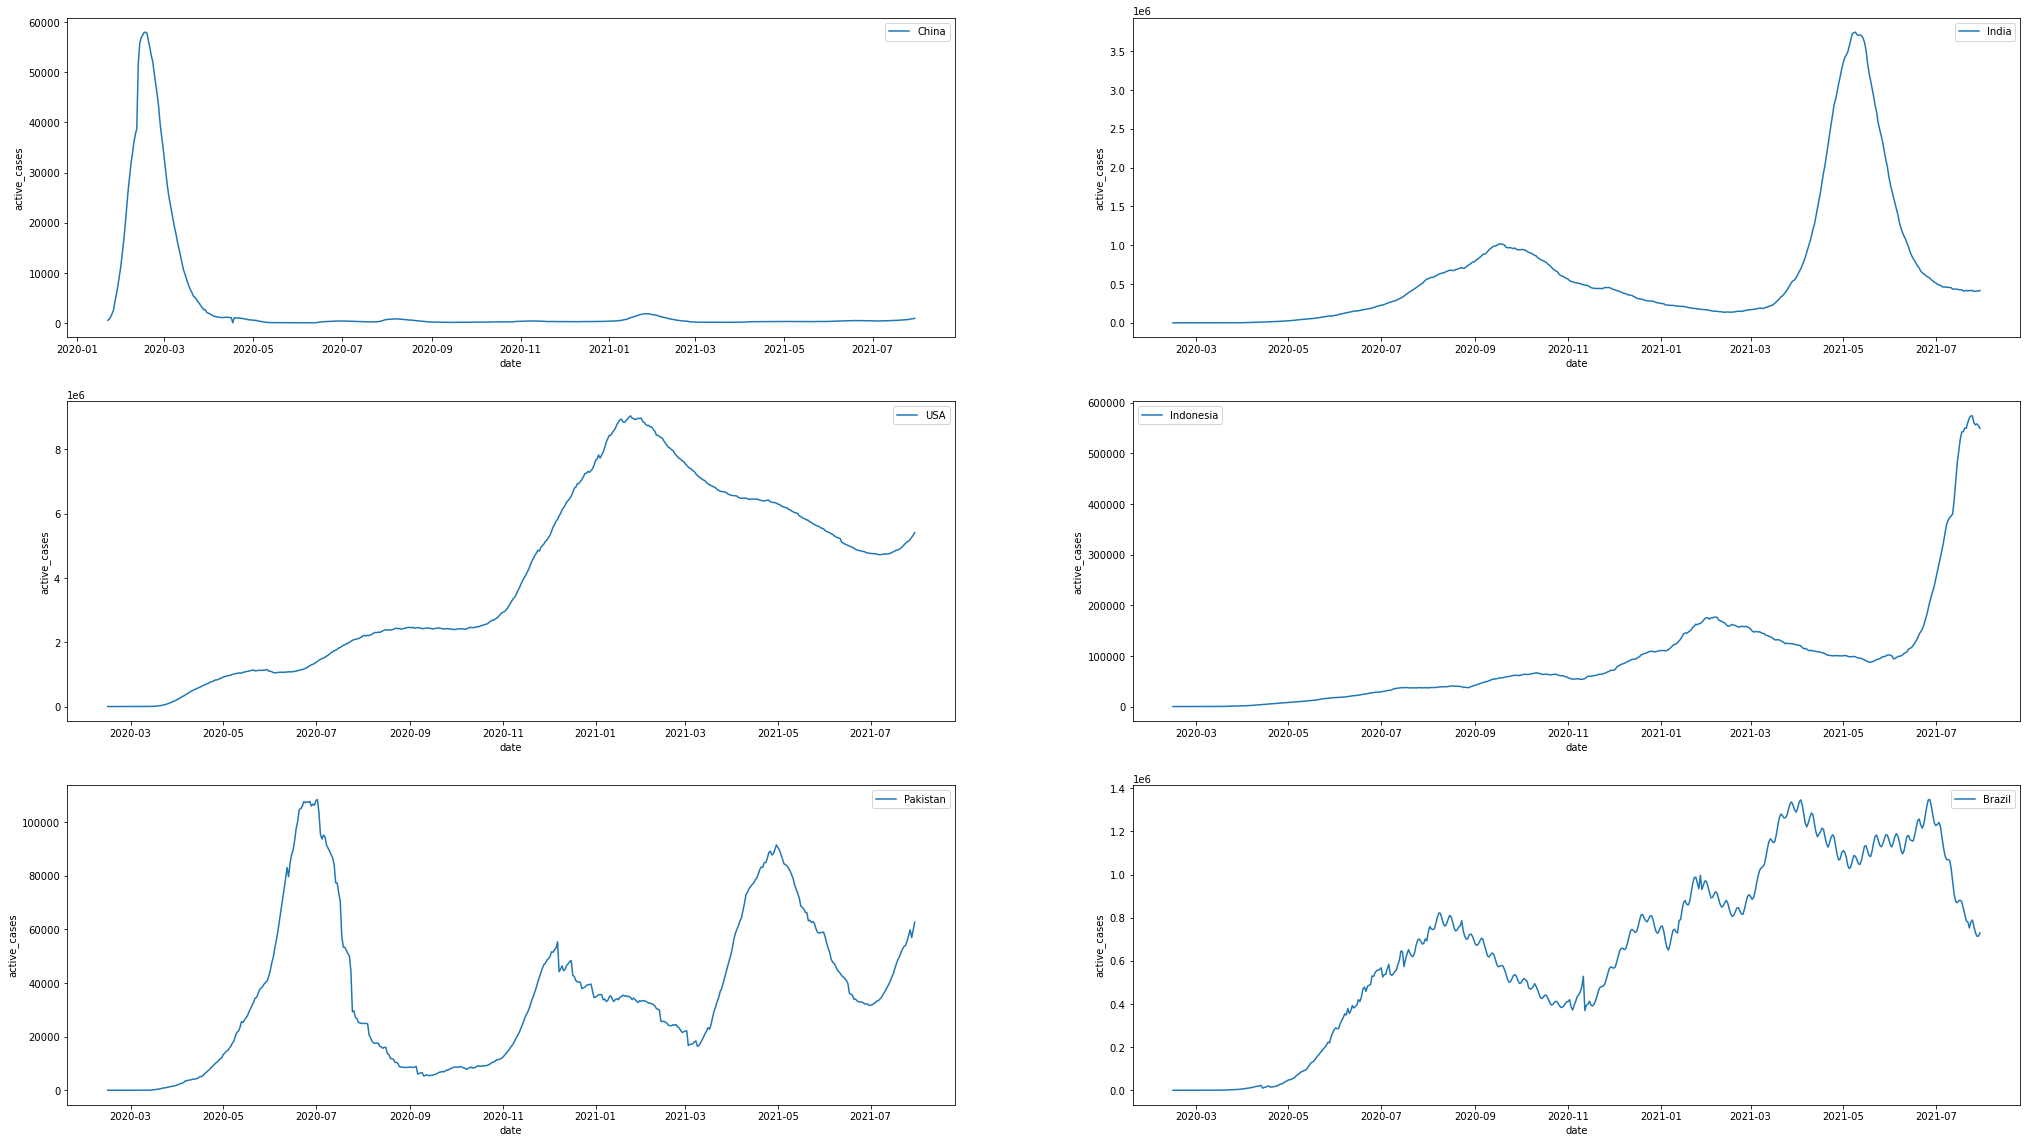

In [13]:
#for top 3...plotting active cases with time for the 6 most populated countries

n_rows=3
n_cols=2
fig,axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(35,20)

for i,country in enumerate(top_6_pop["country"].values):
    df_country = df[df["country"] == country]
    sns.lineplot(x=df_country["date"],y=df_country["active_cases"],ax=axes[i//n_cols,i%n_cols],label=country)
   

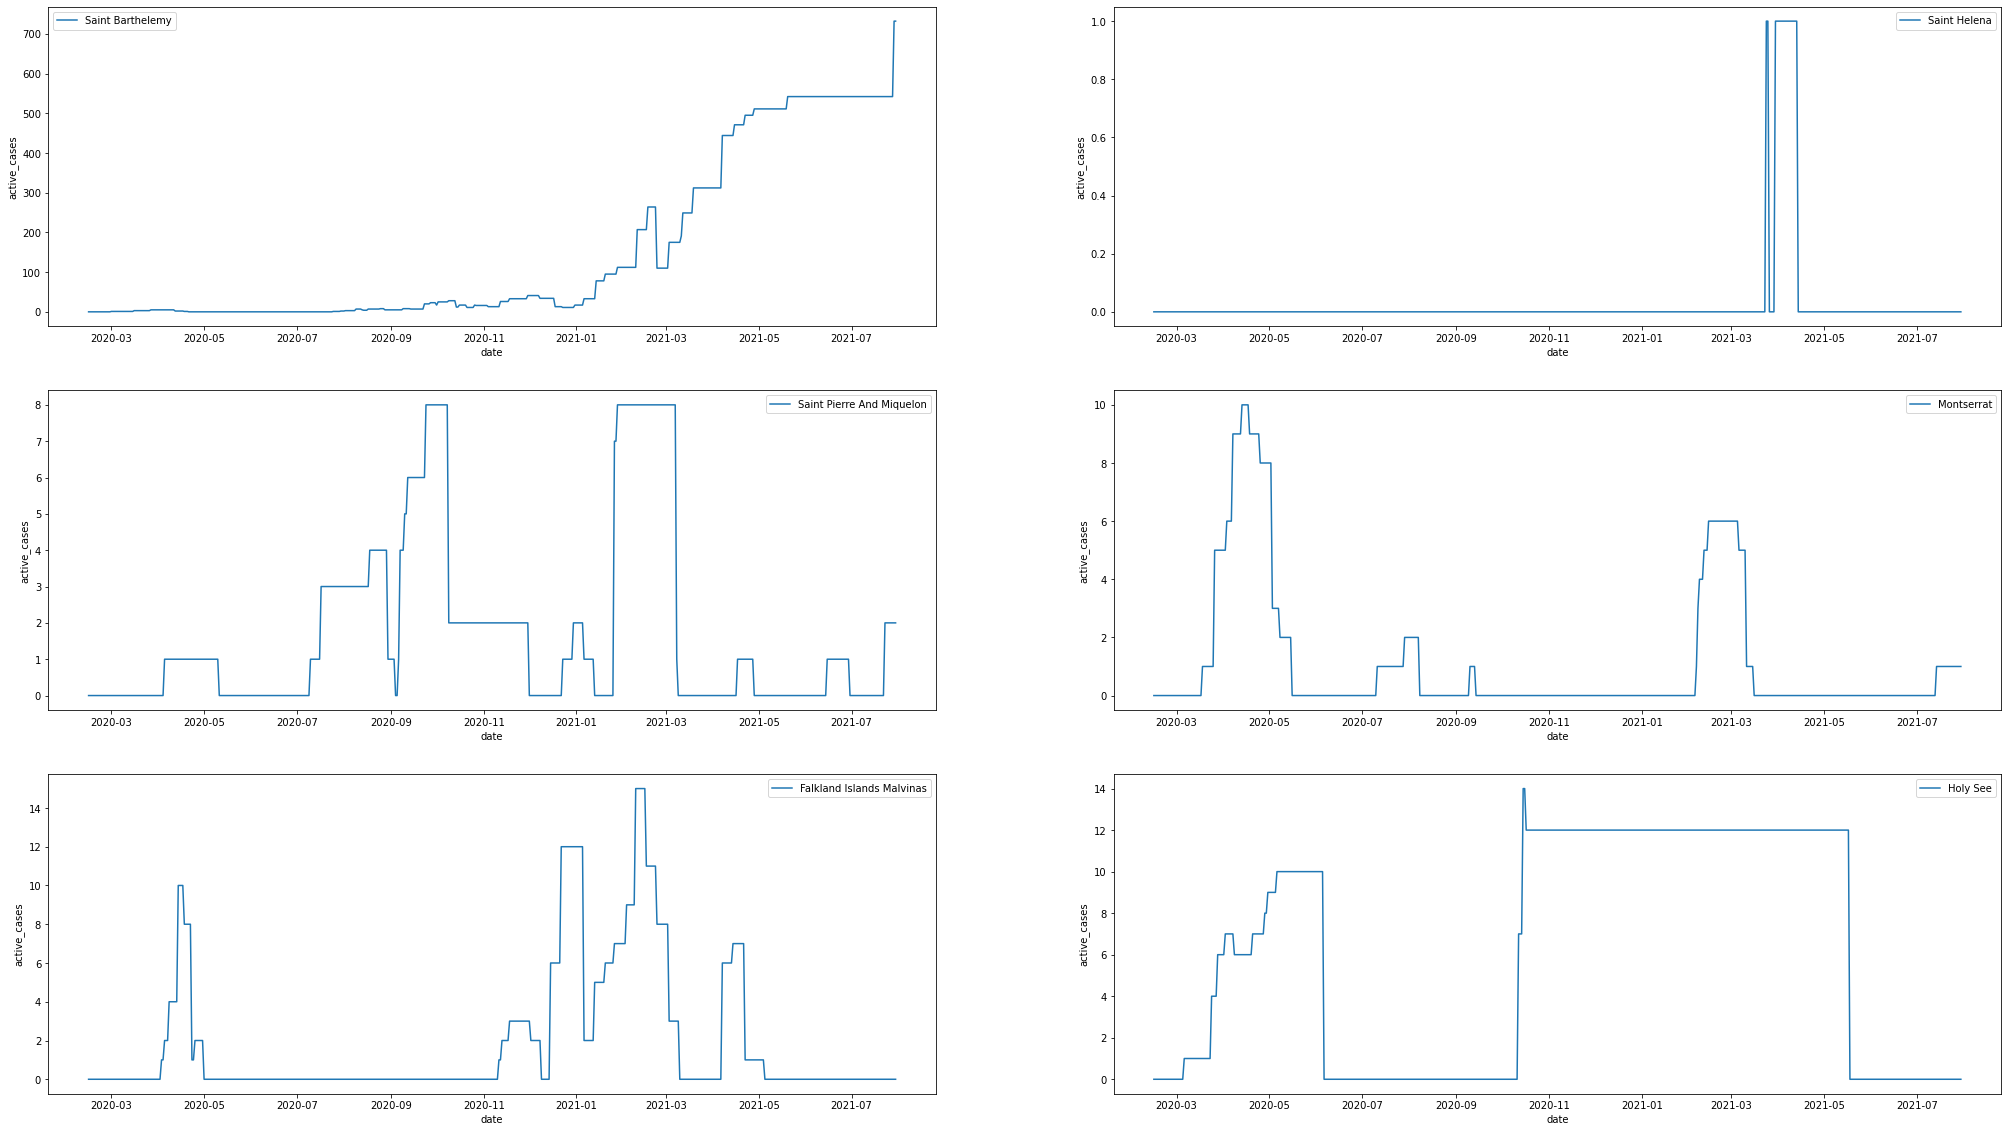

In [14]:
n_rows=3
n_cols=2
fig,axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(35,20)

for i,country in enumerate(last_6_pop["country"].values):
    df_country = df[df["country"] == country]
    sns.lineplot(x=df_country["date"],y=df_country["active_cases"],ax=axes[i//n_cols,i%n_cols],label=country)

FROM THE ABOVE PLOTS, WE CAN OBSERVE THAT TOP POPULATED COUNTRIES LIKE CHINA HAD ACTIVE CASES REACHING AMOST 60000..
WHILE THE LEAST POPULATED LIKE SAINT BARTHELEMY HAD ACTIVE CASES BELOW A 1000.

BUT MORE INTERESTING, WAS A DISCOVERY OF MULTIPLE PEAKS IN THE CHARTS OF SOME COUNTRIES.
THIS PEAKS MOST LIKELY DEPICT SECOND WAVES..PROBABLY DUE TO A NEW STRAIN.
CHINA ACCORDING TO THE NEWS LAST YEAR CONTROLLED THE OUTBREAK AFTER THE FIRST HIT WHICH PROBABLY EXPLAINS THE PRESENCE OF JUST A PEAK.



In [15]:
#LET'S CHECK THE DEGREE OF CORRELATION OF TOTAL CO FIRMED CASES WITH POPULATION
df_summary[["total_confirmed","population"]].corr() 

total_confirmed  population
total_confirmed         1.000000    0.546699
population              0.546699    1.000000

THERE'S A MODERATE CORRELATION ..THIS MODERATE VALUE MIGHT BE DUE TO HIGHLY POPULATED COUNTRIES LIKE CHINA THAT CONTROLLED THE SPREAD AFTER THE FIRST HIT

NOW THAT WE CAN SEE THE OBVIOUS EFFECT POPULATION HAS AND THE PRESENCE OF MULTIPLE WAVES IN SOME COUNTRIES, LET'S  
TAKE THE MOST AND LEAST POPULATED COUNTRIES IN EACH CONTINENT AND CHECK THE COVID-19 SPREAD AND PEAKS

In [5]:
continents = df_summary["continent"].unique() # SELECT THE CONTINENTS
most_populated =[]
least_populated =[]

In [6]:
#CODE TO SELECT THE MOST AND LEAST POPULATED COUNTRIES IN EACH CONTINENT
for con in continents:
    con_df = df_summary[df_summary["continent"] == con]
    most_pop = con_df.sort_values("population",ascending=False)[:1][["country","continent"]]
    least_pop = con_df.sort_values("population",ascending=False)[-1:][["country","continent"]]
    most_populated.append(most_pop["country"].values[0])
    least_populated.append(least_pop["country"].values[0])

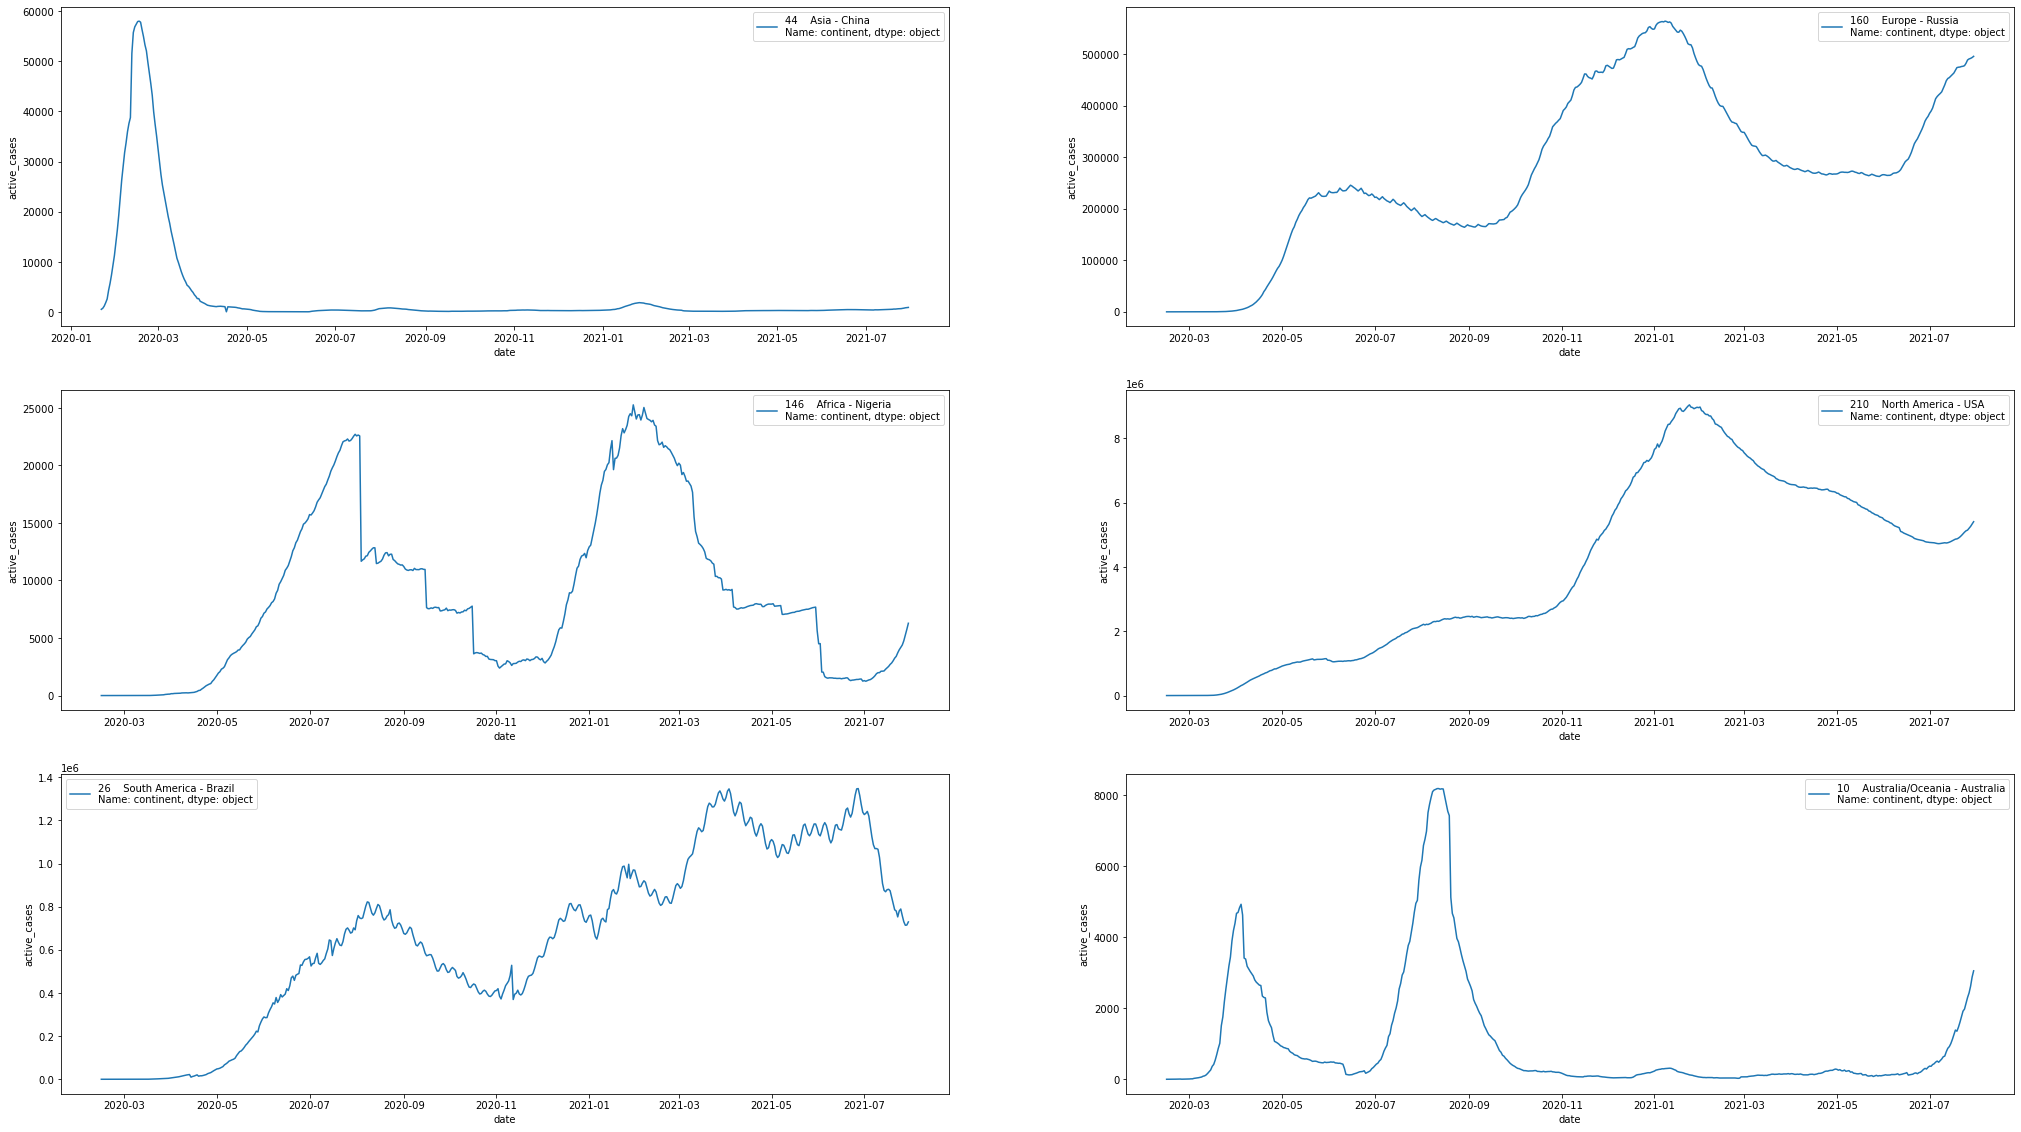

In [15]:
#most_populated in the different continents 
n_rows=3
n_cols=2
fig,axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(35,20)

for i,country in enumerate(most_populated):
    df_country = df[df["country"] == country]
    get_continent = df_summary[df_summary["country"] == country].iloc[[0]]["continent"]
    label = get_continent + " - " + country
    sns.lineplot(x=df_country["date"],y=df_country["active_cases"],ax=axes[i//n_cols,i%n_cols],label=label)

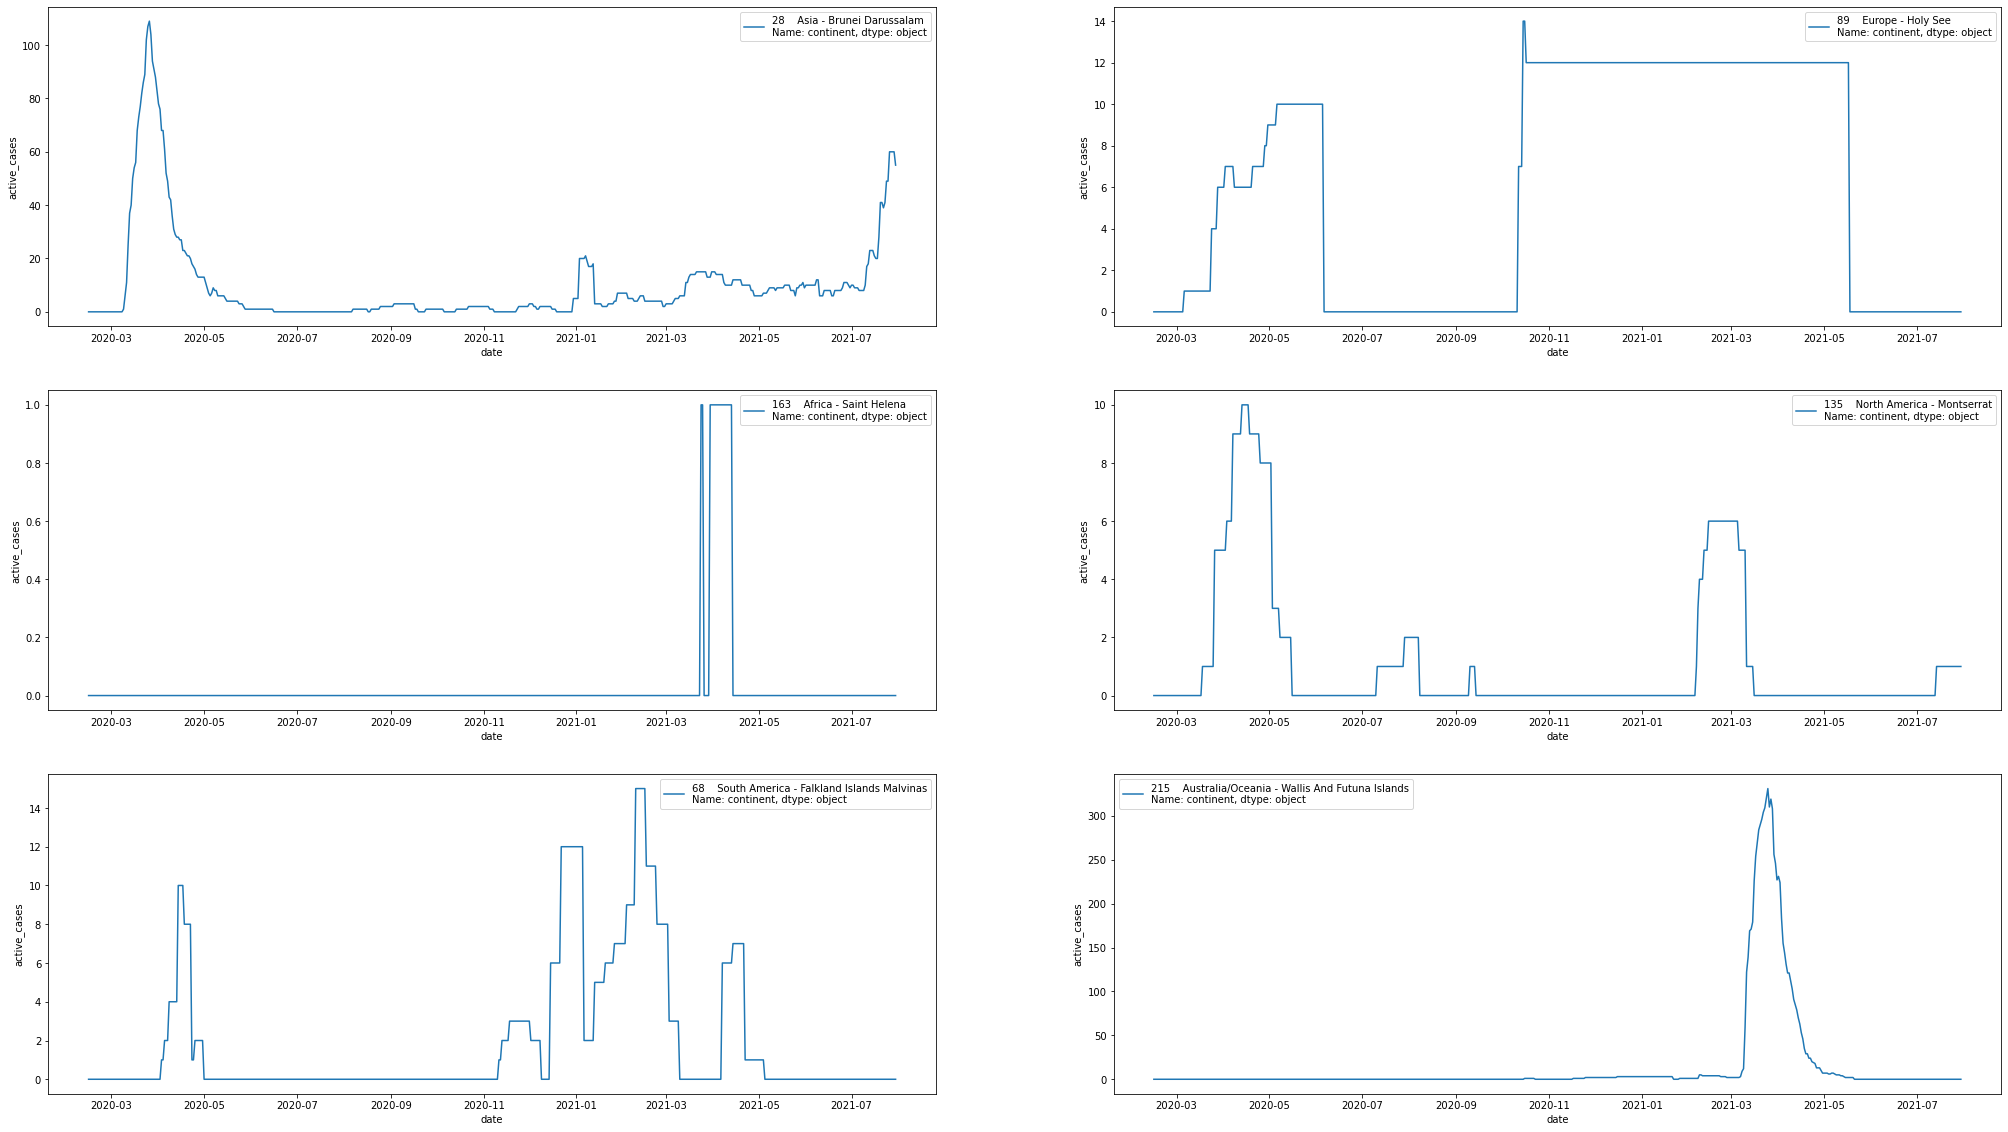

In [19]:
#least_populated in the different continents
n_rows=3
n_cols=2
fig,axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(35,20)

for i,country in enumerate(least_populated):
    df_country = df[df["country"] == country]
    get_continent = df_summary[df_summary["country"] == country].iloc[[0]]["continent"]
    label = get_continent + " - " + country
    sns.lineplot(x=df_country["date"],y=df_country["active_cases"],ax=axes[i//n_cols,i%n_cols],label=label)

FROM THE ABOVE SECTIONS, IT CAN BE OBSERVED THAT FOR SOME COUNTRIES, MULTIPLE WAVES EXISTED, A GOOD NUMBER OF COUNTRIES HAD A WAVE BETWEEN 
NOVEMBER 2020 AND MARCH 2021. THIS WAVE CAME AS A SECOND WAVE FOR SOME COUNTRIES.  

BASED ON CONTINENTS, IT LOOKS LIKE THE WAVE SPREAD WAS EXPERIENCED DIFFERENTLY WITH RESPECT TO THE MOST AND LEAST POPULATED COUNTRIES IN EACH CONTINENT



SOME COUNTRIES LIKE BRAZIL AND RUSSIA HAD NUMBER OF ACTIVE CASES TAKING AN UPWARD TREND FROM THE START

LET US CHECK THE CORRELATION BETWEEN ACTIVE CASES AND DEATH RATE

In [7]:
selected_countries = most_populated + least_populated # LEt's put em in a list

In [ ]:
for country in selected_countries:
    coun_df = df[df["country"] == country][["daily_new_cases","daily_new_deaths"]]
    corr_value = coun_df.corr().loc["daily_new_cases","daily_new_deaths"]
    print(country,corr_value)

Strong correlations can be observed for some, while low and in some cases no value was observed..The no value(Nan) was due to
Little or no cases of death...let us observe

<AxesSubplot:xlabel='daily_new_deaths', ylabel='active_cases'>

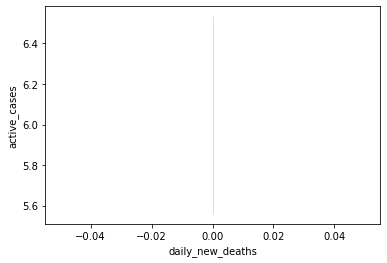

In [11]:
v=df[df["country"] == "Holy See"][["active_cases","daily_new_deaths"]]
sns.lineplot(v["daily_new_deaths"],v["active_cases"])

We can see a faint line at the zero mark of daily_new_deaths . This happened for all contries with Nan...explaining why NAN was obtained

BUT MORE INTERESTING, IS THE PRESENCE OF STRONG CORRELATIONS OF ACTIVE CASES WITH DEATH RATE IN SOME COUNTRIES LIKE RUSSIA, BRAZIL
THIS COULD MEAN IT IS A STRONG PREDICTOR FOR DAILY NEW DEATHS... BUT WE MUST REMEMBER THAT CORRELATION DOES NOT IMPLY CAUSATION.

WE WILL THEREFORE BUILD MODELS FOR COUNTRIES HAVING GOOD CORRELATIONS BETWEEN ACTIVE CASES AND DAILY DEATH..

RUSSIA..BRAZIL..AUSTRALIA..NIGERIA...USA

# MODEL BUILDING

In [12]:
#BUILDING A MODEL FOR 5 of the countries

Death rate should be based on not date alone, but other factors such as number of active cases, level of care etc..
Continent would have been an addition, but we are considering per country 
so, non-linear regression algos from *scikit-learn* and other available packages will be used

In [13]:
#SOME POORLY CORRELATED VARIABLES WERE REMOVED..LEAVING THE BEST FOR EACH COUNTRY E.G
df_russia = df[df["country"] == "Russia"]
df_russia.corr()
#daily_new_cases is strongly correlated with daily_new_deaths but is also strongly correlated with active_cases. 
#Active_cases was selected being clearly a better variable.. Same was done for other variables and countries.


cumulative_total_cases  daily_new_cases  \
cumulative_total_cases                 1.000000         0.516338   
daily_new_cases                        0.516338         1.000000   
active_cases                           0.634754         0.928310   
cumulative_total_deaths                0.989809         0.454647   
daily_new_deaths                       0.852003         0.841067   

                         active_cases  cumulative_total_deaths  \
cumulative_total_cases       0.634754                 0.989809   
daily_new_cases              0.928310                 0.454647   
active_cases                 1.000000                 0.550727   
cumulative_total_deaths      0.550727                 1.000000   
daily_new_deaths             0.880739                 0.812663   

                         daily_new_deaths  
cumulative_total_cases           0.852003  
daily_new_cases                  0.841067  
active_cases                     0.880739  
cumulative_total_deaths          0.812663  
daily_new_deaths                 1.000000

In [14]:
df_russia = df[df["country"] == "Russia"][["date","active_cases","cumulative_total_deaths","daily_new_deaths"]]
df_brazil = df[df["country"] == "Brazil"][["date","active_cases","daily_new_cases","daily_new_deaths"]]
df_australia = df[df["country"] == "Australia"][["date","active_cases","cumulative_total_cases","daily_new_deaths"]]
df_nigeria = df[df["country"] == "Nigeria"][["date","active_cases","daily_new_cases","daily_new_deaths"]]
df_usa = df[df["country"] == "USA"][["date","active_cases","daily_new_cases","daily_new_deaths"]]

In [15]:
df_russia.head()

date  active_cases  cumulative_total_deaths  daily_new_deaths
85144 2020-02-15           0.0                      0.0               0.0
85145 2020-02-16           0.0                      0.0               0.0
85146 2020-02-17           0.0                      0.0               0.0
85147 2020-02-18           0.0                      0.0               0.0
85148 2020-02-19           0.0                      0.0               0.0

In [16]:
df_russia["date"] = pd.to_numeric(df_russia["date"].dt.strftime('%y%m%d'))
df_brazil["date"] = pd.to_numeric(df_brazil["date"].dt.strftime('%y%m%d'))
df_australia["date"] = pd.to_numeric(df_australia["date"].dt.strftime('%y%m%d'))
df_nigeria["date"] = pd.to_numeric(df_nigeria["date"].dt.strftime('%y%m%d'))
df_usa["date"] = pd.to_numeric(df_usa["date"].dt.strftime('%y%m%d'))

In [17]:
df_russia.head()

date  active_cases  cumulative_total_deaths  daily_new_deaths
85144  200215           0.0                      0.0               0.0
85145  200216           0.0                      0.0               0.0
85146  200217           0.0                      0.0               0.0
85147  200218           0.0                      0.0               0.0
85148  200219           0.0                      0.0               0.0

In [18]:
x_russia=df_russia[["date","active_cases","cumulative_total_deaths"]]
y_russia=df_russia[["daily_new_deaths"]]

x_brazil=df_brazil[["date","active_cases","daily_new_cases"]]
y_brazil=df_brazil[["daily_new_deaths"]]

x_australia=df_australia[["date","active_cases","cumulative_total_cases"]]
y_australia=df_australia[["daily_new_deaths"]]

x_nigeria=df_nigeria[["date","active_cases","daily_new_cases"]]
y_nigeria=df_nigeria[["daily_new_deaths"]]

x_usa=df_usa[["date","active_cases","daily_new_cases"]]
y_usa=df_usa[["daily_new_deaths"]]



In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train_russia, x_test_russia, y_train_russia, y_test_russia = train_test_split(x_russia,y_russia,test_size=0.2,random_state=21)
x_train_brazil, x_test_brazil, y_train_brazil, y_test_brazil = train_test_split(x_brazil,y_brazil,test_size=0.2,random_state=21)
x_train_australia, x_test_australia, y_train_australia, y_test_australia = train_test_split(x_australia,y_australia,test_size=0.2,random_state=21)
x_train_nigeria, x_test_nigeria, y_train_nigeria, y_test_nigeria = train_test_split(x_nigeria,y_nigeria,test_size=0.2,random_state=21)
x_train_usa, x_test_usa, y_train_usa, y_test_usa = train_test_split(x_usa,y_usa,test_size=0.2,random_state=21)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import pickle

In [22]:
scaler_russia = StandardScaler()
scaler_brazil = StandardScaler()
scaler_australia = StandardScaler()
scaler_nigeria = StandardScaler()
scaler_usa = StandardScaler()

In [23]:
x_train_russia_scaled = scaler_russia.fit_transform(x_train_russia)
x_test_russia_scaled = scaler_russia.transform(x_test_russia)
pickle.dump(scaler_russia,open("scaler_russia.sav","wb"))

x_train_brazil_scaled = scaler_brazil.fit_transform(x_train_brazil)
x_test_brazil_scaled = scaler_brazil.transform(x_test_brazil)
pickle.dump(scaler_brazil,open("scaler_brazil.sav","wb"))

x_train_australia_scaled = scaler_australia.fit_transform(x_train_australia)
x_test_australia_scaled = scaler_australia.transform(x_test_australia)
pickle.dump(scaler_australia,open("scaler_australia.sav","wb"))

x_train_nigeria_scaled = scaler_nigeria.fit_transform(x_train_nigeria)
x_test_nigeria_scaled = scaler_nigeria.transform(x_test_nigeria)
pickle.dump(scaler_nigeria,open("scaler_nigeria.sav","wb"))

x_train_usa_scaled = scaler_usa.fit_transform(x_train_usa)
x_test_usa_scaled = scaler_usa.transform(x_test_usa)
pickle.dump(scaler_usa,open("scaler_usa.sav","wb"))

# SUPER VECTOR REGRESSION

In [24]:
#RUSSIA

In [25]:
from sklearn.svm import SVR
reg_svr_russia=SVR(kernel="linear")
reg_svr_russia.fit(x_train_russia_scaled,y_train_russia)
y_pred_russia_svr = reg_svr_russia.predict(x_test_russia_scaled)
r2_score(y_test_russia,y_pred_russia_svr)

0.9219193329580317

In [26]:
mean_squared_error(y_test_russia,y_pred_russia_svr,squared=False) #THE SQUARE = FALSE makes it RMSE and not MSE

53.14634830162833

In [27]:
#BRAZIL

In [28]:
from sklearn.svm import SVR
reg_svr_brazil=SVR(kernel="linear")
reg_svr_brazil.fit(x_train_brazil_scaled,y_train_brazil)
y_pred_brazil_svr = reg_svr_brazil.predict(x_test_brazil_scaled)
r2_score(y_test_brazil,y_pred_brazil_svr)

0.578602491009806

In [29]:
mean_squared_error(y_test_brazil,y_pred_brazil_svr,squared=False) #THE SQUARE = FALSE makes it RMSE and not MSE

584.1911449727841

In [30]:
#AUSTRALIA

In [31]:
from sklearn.svm import SVR
reg_svr_australia=SVR(kernel="rbf")
reg_svr_australia.fit(x_train_australia_scaled,y_train_australia)
y_pred_australia_svr = reg_svr_australia.predict(x_test_australia_scaled)
australia_best_score = r2_score(y_test_australia,y_pred_australia_svr)
australia_best_score

0.7635581042909886

In [32]:
australia_best_rmse = mean_squared_error(y_test_australia,y_pred_australia_svr,squared=False) #THE SQUARE = FALSE makes it RMSE and not MSE
australia_best_rmse

2.3750930620932778

In [33]:
pickle.dump(reg_svr_australia,open("australia_svr.sav","wb"))

In [34]:
#NIGERIA

In [35]:
from sklearn.svm import SVR
reg_svr_nigeria=SVR(kernel="rbf")
reg_svr_nigeria.fit(x_train_nigeria_scaled,y_train_nigeria)
y_pred_nigeria_svr = reg_svr_nigeria.predict(x_test_nigeria_scaled)
r2_score(y_test_nigeria,y_pred_nigeria_svr)

0.467237078336615

In [36]:
mean_squared_error(y_test_nigeria,y_pred_nigeria_svr,squared=False) #THE SQUARE = FALSE makes it RMSE and not MSE

3.712203315595588

In [37]:
#USA

In [38]:
from sklearn.svm import SVR
reg_svr_usa=SVR(kernel="rbf")
reg_svr_usa.fit(x_train_usa_scaled,y_train_usa)
y_pred_usa_svr = reg_svr_usa.predict(x_test_usa_scaled)
r2_score(y_test_usa,y_pred_usa_svr)

-0.0593794806454937

In [39]:
mean_squared_error(y_test_usa,y_pred_usa_svr,squared=False) #THE SQUARE = FALSE makes it RMSE and not MSE

1153.6131221850812

# DECISION TREE REGRESSION

In [40]:
#RUSSIA

In [41]:
from sklearn.tree import DecisionTreeRegressor
reg_dtree_russia=DecisionTreeRegressor(random_state=21)
reg_dtree_russia.fit(x_train_russia_scaled,y_train_russia)
y_pred_russia_dtree = reg_dtree_russia.predict(x_test_russia_scaled)
r2_score(y_test_russia,y_pred_russia_dtree)

0.9619038386419325

In [42]:
mean_squared_error(y_test_russia,y_pred_russia_dtree,squared=False)

37.12293293279385

In [43]:
#BRAZIL

In [44]:
from sklearn.tree import DecisionTreeRegressor
reg_dtree_brazil = DecisionTreeRegressor(random_state=21)
reg_dtree_brazil.fit(x_train_brazil_scaled,y_train_brazil)
y_pred_brazil_dtree = reg_dtree_brazil.predict(x_test_brazil_scaled)
r2_score(y_test_brazil,y_pred_brazil_dtree)

0.9081298825074539

In [45]:
mean_squared_error(y_test_brazil,y_pred_brazil_dtree,squared=False)

272.7696984842982

In [46]:
#FOR AUSTRALIA

In [47]:
from sklearn.tree import DecisionTreeRegressor
reg_dtree_australia = DecisionTreeRegressor(random_state=21)
reg_dtree_australia.fit(x_train_australia_scaled,y_train_australia)
y_pred_australia_dtree = reg_dtree_australia.predict(x_test_australia_scaled)
r2_score(y_test_australia,y_pred_australia_dtree)

-0.46269476335520165

In [48]:
mean_squared_error(y_test_australia,y_pred_australia_dtree,squared=False)

5.90738489195365

In [49]:
#NIGERIA

In [50]:
from sklearn.tree import DecisionTreeRegressor
reg_dtree_nigeria = DecisionTreeRegressor(random_state=21)
reg_dtree_nigeria.fit(x_train_nigeria_scaled,y_train_nigeria)
y_pred_nigeria_dtree = reg_dtree_nigeria.predict(x_test_nigeria_scaled)
r2_score(y_test_nigeria,y_pred_nigeria_dtree)

0.13898493955561553

In [51]:
mean_squared_error(y_test_nigeria,y_pred_nigeria_dtree,squared=False)

4.719219007143362

In [52]:
#USA

In [53]:
from sklearn.tree import DecisionTreeRegressor
reg_dtree_usa = DecisionTreeRegressor(random_state=21)
reg_dtree_usa.fit(x_train_usa_scaled,y_train_usa)
y_pred_usa_dtree = reg_dtree_usa.predict(x_test_usa_scaled)
r2_score(y_test_usa,y_pred_usa_dtree)

0.878848255138852

In [54]:
mean_squared_error(y_test_usa,y_pred_usa_dtree,squared=False)

390.12092541748916

# RANDOM FOREST REGRESSION

In [55]:
#RUSSIA

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg_forest_russia=RandomForestRegressor(random_state=21)
reg_forest_russia.fit(x_train_russia_scaled,y_train_russia)
y_pred_russia_forest = reg_forest_russia.predict(x_test_russia_scaled)
r2_score(y_test_russia,y_pred_russia_forest)

0.9699221738417629

In [57]:
mean_squared_error(y_test_russia,y_pred_russia_forest,squared=False)

32.98563844956217

In [58]:
#BRAZIL

In [59]:
from sklearn.ensemble import RandomForestRegressor
reg_forest_brazil=RandomForestRegressor(random_state=21)
reg_forest_brazil.fit(x_train_brazil_scaled,y_train_brazil)
y_pred_brazil_forest = reg_forest_brazil.predict(x_test_brazil_scaled)
r2_score(y_test_brazil,y_pred_brazil_forest)

0.9450991128089344

In [60]:
mean_squared_error(y_test_brazil,y_pred_brazil_forest,squared=False)

210.86216878623262

In [61]:
#AUSTRALIA

In [62]:
from sklearn.ensemble import RandomForestRegressor
reg_forest_australia=RandomForestRegressor(random_state=21)
reg_forest_australia.fit(x_train_australia_scaled,y_train_australia)
y_pred_australia_forest = reg_forest_australia.predict(x_test_australia_scaled)
r2_score(y_test_australia,y_pred_australia_forest)

0.7370887641313262

In [63]:
mean_squared_error(y_test_australia,y_pred_australia_forest,squared=False)

2.5045112568151935

In [64]:
#NIGERIA

In [65]:
from sklearn.ensemble import RandomForestRegressor
reg_forest_nigeria=RandomForestRegressor(random_state=21)
reg_forest_nigeria.fit(x_train_nigeria_scaled,y_train_nigeria)
y_pred_nigeria_forest = reg_forest_nigeria.predict(x_test_nigeria_scaled)
r2_score(y_test_nigeria,y_pred_nigeria_forest)

0.44850019821705944

In [66]:
mean_squared_error(y_test_nigeria,y_pred_nigeria_forest,squared=False)

3.7769169793839628

In [67]:
#USA

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg_forest_usa=RandomForestRegressor(random_state=21)
reg_forest_usa.fit(x_train_usa_scaled,y_train_usa)
y_pred_usa_forest = reg_forest_usa.predict(x_test_usa_scaled)
r2_score(y_test_usa,y_pred_usa_forest)

0.9304689667936881

In [69]:
mean_squared_error(y_test_usa,y_pred_usa_forest,squared=False)

295.5450912732284

# GRADIENT BOOSTING REGRESSION

In [70]:
# RUSSIA

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gbr_russia=GradientBoostingRegressor(random_state=21)
reg_gbr_russia.fit(x_train_russia_scaled,y_train_russia)
y_pred_russia_gbr = reg_gbr_russia.predict(x_test_russia_scaled)
r2_score(y_test_russia,y_pred_russia_gbr)

0.965702557185249

In [72]:
mean_squared_error(y_test_russia,y_pred_russia_gbr,squared=False)

35.223502810927464

In [73]:
#BRAZIL

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gbr_brazil=GradientBoostingRegressor(random_state=21)
reg_gbr_brazil.fit(x_train_brazil_scaled,y_train_brazil)
y_pred_brazil_gbr = reg_gbr_brazil.predict(x_test_brazil_scaled)
r2_score(y_test_brazil,y_pred_brazil_gbr)

0.94671488070385

In [75]:
mean_squared_error(y_test_brazil,y_pred_brazil_gbr,squared=False)

207.73609280522123

In [76]:
#AUSTRALIA

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gbr_australia=GradientBoostingRegressor(random_state=21)
reg_gbr_australia.fit(x_train_australia_scaled,y_train_australia)
y_pred_australia_gbr = reg_gbr_australia.predict(x_test_australia_scaled)
r2_score(y_test_australia,y_pred_australia_gbr)

0.6056426200305054

In [78]:
#NIGERIA

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gbr_nigeria=GradientBoostingRegressor(random_state=21,min_samples_split=6)
reg_gbr_nigeria.fit(x_train_nigeria_scaled,y_train_nigeria)
y_pred_nigeria_gbr = reg_gbr_nigeria.predict(x_test_nigeria_scaled)
nigeria_best_score = r2_score(y_test_nigeria,y_pred_nigeria_gbr)
nigeria_best_score

0.5094101179941831

In [80]:
nigeria_best_rmse = mean_squared_error(y_test_australia,y_pred_australia_gbr,squared=False)
nigeria_best_rmse

3.067350473143929

In [81]:
pickle.dump(reg_gbr_nigeria,open("nigeria_gb.sav","wb"))

In [82]:
#USA

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gbr_usa=GradientBoostingRegressor(random_state=21)
reg_gbr_usa.fit(x_train_usa_scaled,y_train_usa)
y_pred_usa_gbr = reg_gbr_usa.predict(x_test_usa_scaled)
r2_score(y_test_usa,y_pred_usa_gbr)

0.9179670085626562

In [84]:
mean_squared_error(y_test_usa,y_pred_usa_gbr,squared=False)

321.01748173788997

# XGBOOST REGRESSION

In [85]:
#RUSSIA

In [86]:
from xgboost import XGBRegressor
reg_xgb_russia = XGBRegressor(random_state=21,min_child_weight=2) #optimized with min_child_weight
reg_xgb_russia.fit(x_train_russia_scaled,y_train_russia)
y_pred_russia_xgb = reg_xgb_russia.predict(x_test_russia_scaled)
russia_best_score = r2_score(y_test_russia,y_pred_russia_xgb)
russia_best_score

0.9710942400150931

In [87]:
russia_best_rmse = mean_squared_error(y_test_russia,y_pred_russia_xgb,squared=False)
russia_best_rmse

32.336563784085534

In [88]:
pickle.dump(reg_xgb_russia,open("russia_xgboost.sav","wb"))

In [89]:
#BRAZIL

In [90]:
from xgboost import XGBRegressor
reg_xgb_brazil = XGBRegressor(random_state=21,min_child_weight=2) #optimized with min_child_weight
reg_xgb_brazil.fit(x_train_brazil_scaled,y_train_brazil)
y_pred_brazil_xgb = reg_xgb_brazil.predict(x_test_brazil_scaled)
brazil_best_score = r2_score(y_test_brazil,y_pred_brazil_xgb)
brazil_best_score

0.9512355074523763

In [91]:
brazil_best_rmse = mean_squared_error(y_test_brazil,y_pred_brazil_xgb,squared=False)
brazil_best_rmse

198.72881475341075

In [92]:
pickle.dump(reg_xgb_brazil,open("brazil_xgboost.sav","wb"))

In [93]:
#AUSTRALIA

In [94]:
from xgboost import XGBRegressor
reg_xgb_australia = XGBRegressor(random_state=21,min_child_weight=2) #optimized with min_child_weight
reg_xgb_australia.fit(x_train_australia_scaled,y_train_australia)
y_pred_australia_xgb = reg_xgb_australia.predict(x_test_australia_scaled)
r2_score(y_test_australia,y_pred_australia_xgb)

0.6187576630926609

In [95]:
mean_squared_error(y_test_australia,y_pred_australia_xgb,squared=False)

3.01591415890731

In [96]:
#NIGERIA

In [97]:
from xgboost import XGBRegressor
reg_xgb_nigeria = XGBRegressor(random_state=21,min_child_weight=2) #optimized with min_child_weight
reg_xgb_nigeria.fit(x_train_nigeria_scaled,y_train_nigeria)
y_pred_nigeria_xgb = reg_xgb_nigeria.predict(x_test_nigeria_scaled)
r2_score(y_test_nigeria,y_pred_nigeria_xgb)

0.4240463100892936

In [98]:
mean_squared_error(y_test_nigeria,y_pred_nigeria_xgb,squared=False)

3.8597443560462166

In [99]:
#USA

In [100]:
from xgboost import XGBRegressor
reg_xgb_usa = XGBRegressor(random_state=21)
reg_xgb_usa.fit(x_train_usa_scaled,y_train_usa)
y_pred_usa_xgb = reg_xgb_usa.predict(x_test_usa_scaled)
usa_best_score = r2_score(y_test_usa,y_pred_usa_xgb)
usa_best_score

0.9450192822937409

In [101]:
usa_best_rmse = mean_squared_error(y_test_usa,y_pred_usa_xgb,squared=False)
usa_best_rmse

262.80862342560044

In [102]:
pickle.dump(reg_xgb_usa,open("usa_xgboost.sav","wb"))

# SUMMARY SHOWING BEST MODELS FOR SELECTED COUNTRIES

In [103]:
score_summary = pd.DataFrame()
score_summary["Countries"] = ["Russia","Brazil","Australia","Nigeria","USA"]
score_summary["Best_Algorithms"] = ["XGBoost","XGBoost","Super Vector","Gradient_Boosting","XGBoost"]
score_summary["R-score"] = [russia_best_score,brazil_best_score,australia_best_score,nigeria_best_score,usa_best_score]
score_summary["RMSE"] = [russia_best_rmse,brazil_best_rmse,australia_best_rmse,nigeria_best_rmse,usa_best_score]

In [104]:
score_summary

Countries    Best_Algorithms   R-score        RMSE
0     Russia            XGBoost  0.971094   32.336564
1     Brazil            XGBoost  0.951236  198.728815
2  Australia       Super Vector  0.763558    2.375093
3    Nigeria  Gradient_Boosting  0.509410    3.067350
4        USA            XGBoost  0.945019    0.945019

In [105]:
score_summary.set_index("Countries",inplace=True)

In [106]:
score_summary

Best_Algorithms   R-score        RMSE
Countries                                         
Russia               XGBoost  0.971094   32.336564
Brazil               XGBoost  0.951236  198.728815
Australia       Super Vector  0.763558    2.375093
Nigeria    Gradient_Boosting  0.509410    3.067350
USA                  XGBoost  0.945019    0.945019

ALSO..IT SHOULD BE NOTED THAT THE VALUES PREDICTED WITH THESE MODELS SHOULD ONLY BE RELIED UPON AS FAR AS...

THE CONDITIONS DURING THE MODEL BUILDING REMAIN.

E.G SIGNIFICANT EVENTS SUCH AS THE DEVELOPMENT OF A NEW VACCINE OR A PRESCRIPTION DRUG COULD REDUCE DEATH CASES